# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

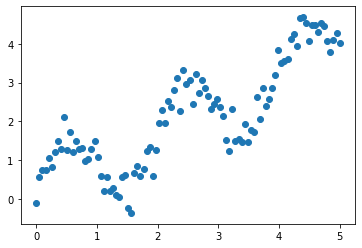

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [11]:
x.shape

(100,)

In [12]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [13]:
regr_lin.fit(X,y)

LinearRegression()

0.5807370270457949


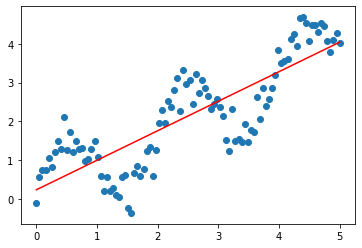

In [14]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [15]:
print(x.shape)

(100,)


In [16]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [17]:
regr_poly = LinearRegression()

In [18]:
regr_poly.fit(X_poly, y)

LinearRegression()

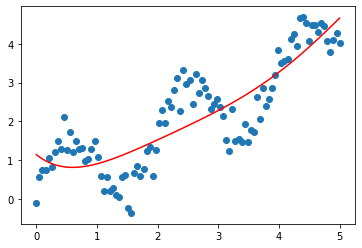

In [19]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [20]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.25153826  1.45974357 -0.53376998  0.09430598 -0.0060599 ]
interception:  1.1454790879240675


In [21]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.14547909, 1.08592539, 1.03341455, 0.98755578, 0.94797254,
       0.91430229, 0.88619627, 0.86331925, 0.84534928, 0.83197749,
       0.8229078 , 0.81785672, 0.81655309, 0.81873783, 0.82416377,
       0.8325953 , 0.84380822, 0.85758948, 0.87373692, 0.89205905,
       0.91237479, 0.93451326, 0.95831352, 0.98362436, 1.01030401,
       1.03821993, 1.0672486 , 1.09727523, 1.12819354, 1.15990554,
       1.19232127, 1.22535856, 1.2589428 , 1.2930067 , 1.32749005,
       1.36233948, 1.39750823, 1.43295588, 1.46864816, 1.50455667,
       1.54065866, 1.57693678, 1.61337885, 1.64997763, 1.68673056,
       1.72363954, 1.76071066, 1.79795401, 1.8353834 , 1.87301614,
       1.91087279, 1.94897692, 1.98735491, 2.02603565, 2.06505034,
       2.10443224, 2.14421643, 2.18443957, 2.22513969, 2.26635589,
       2.30812816, 2.35049711, 2.39350375, 2.43718921, 2.48159456,
       2.52676053, 2.57272728, 2.61953418, 2.66721954, 2.71582039,
       2.76537224, 2.81590882, 2.86746189, 2.92006095, 2.97373

In [22]:
regr_poly.predict(X_poly)

array([1.14547909, 1.08592539, 1.03341455, 0.98755578, 0.94797254,
       0.91430229, 0.88619627, 0.86331925, 0.84534928, 0.83197749,
       0.8229078 , 0.81785672, 0.81655309, 0.81873783, 0.82416377,
       0.8325953 , 0.84380822, 0.85758948, 0.87373692, 0.89205905,
       0.91237479, 0.93451326, 0.95831352, 0.98362436, 1.01030401,
       1.03821993, 1.0672486 , 1.09727523, 1.12819354, 1.15990554,
       1.19232127, 1.22535856, 1.2589428 , 1.2930067 , 1.32749005,
       1.36233948, 1.39750823, 1.43295588, 1.46864816, 1.50455667,
       1.54065866, 1.57693678, 1.61337885, 1.64997763, 1.68673056,
       1.72363954, 1.76071066, 1.79795401, 1.8353834 , 1.87301614,
       1.91087279, 1.94897692, 1.98735491, 2.02603565, 2.06505034,
       2.10443224, 2.14421643, 2.18443957, 2.22513969, 2.26635589,
       2.30812816, 2.35049711, 2.39350375, 2.43718921, 2.48159456,
       2.52676053, 2.57272728, 2.61953418, 2.66721954, 2.71582039,
       2.76537224, 2.81590882, 2.86746189, 2.92006095, 2.97373

In [23]:
Y_poly = regr_poly.predict(X_poly)
mse = np.sum((Y_poly-y)**2) / len(y)
print(mse)

0.49739993115909187


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [24]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [25]:
sigma = 0.3

In [26]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [27]:
regr_rbf = LinearRegression()

In [28]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

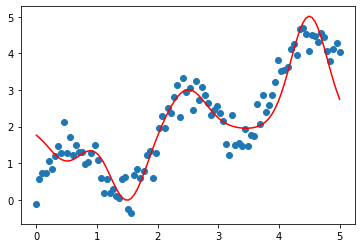

In [29]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [30]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.92741971 -2.00577082  1.02148608 -0.05331953  3.01901771]
interception:  1.9962021210816832


#### Comparison

In [31]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

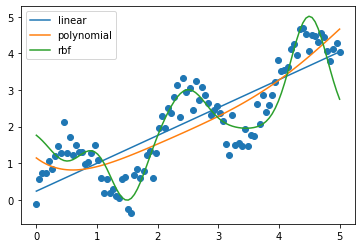

In [32]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [33]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5807370270457949


In [34]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.49739993115909187


In [35]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.26025049743416784
